In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

## EDA

In [ ]:
#https://www.kaggle.com/datasets/imtkaggleteam/breast-cancer?resource=download#

data = pd.read_csv(r"C:\Users\eg1\Downloads\archive (5)\breast-cancer-wisconsin-data_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data.drop(['id','Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<AxesSubplot:>

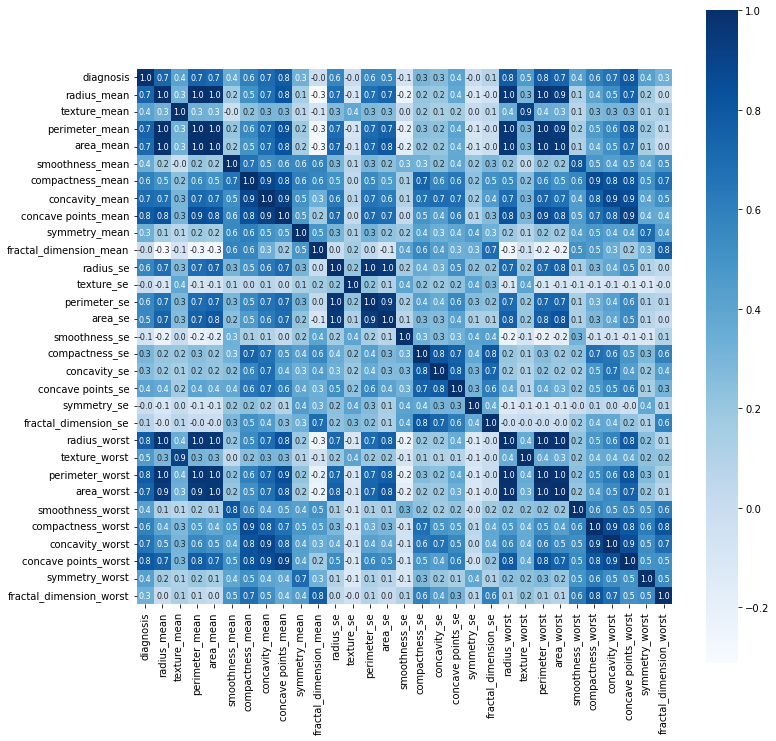

In [ ]:
correlation = df.corr()
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(12,12))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
abs(df.corr())[['diagnosis']].style.background_gradient(cmap='BuPu')


,diagnosis
diagnosis,1.000000
radius_mean,0.730029
texture_mean,0.415185
perimeter_mean,0.742636
area_mean,0.708984
smoothness_mean,0.358560
compactness_mean,0.596534
concavity_mean,0.696360
concave points_mean,0.776614
symmetry_mean,0.330499


## Classification using Decision tree before dimensionality reduction

In [ ]:
x = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

Accuracy: 0.9532163742690059

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.99      0.96       108
           0       0.98      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



<AxesSubplot:>

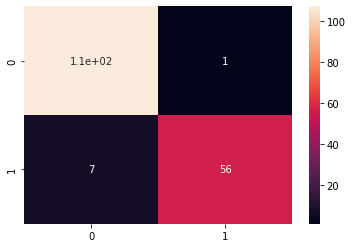

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['1','0']))


from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## Using PCA to reduce dimension to 8 columns

In [ ]:
data_pca = pd.read_csv(r"C:\Users\eg1\Downloads\archive (5)\breast-cancer-wisconsin-data_data.csv")
data_pca.drop(['id','Unnamed: 32'], axis = 1, inplace = True)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])

x = data_pca.drop(['diagnosis'], axis = 1)
y = data_pca['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.43430767 0.19740115 0.09351771 0.06677661 0.05642452 0.04071619
 0.02149254 0.01512693]


Accuracy: 0.9298245614035088

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        67
           0       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



<AxesSubplot:>

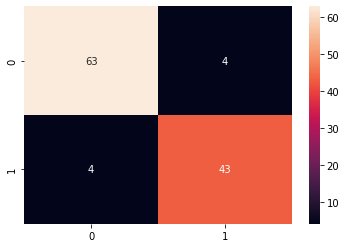

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_pca, y_train)
y_pred = classifier.predict(X_test_pca)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['1','0']))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## Xgboost without PCA

Accuracy: 0.956140350877193

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.96      0.96        67
           0       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

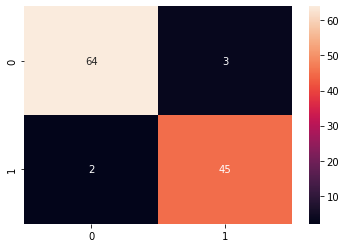

In [ ]:
#https://www.educative.io/answers/classification-using-xgboost-in-python

import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv(r"C:\Users\eg1\Downloads\archive (5)\breast-cancer-wisconsin-data_data.csv")
df.drop(['id','Unnamed: 32'], axis = 1, inplace = True)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])

x = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = xgb.XGBClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['1','0']))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## Xgboost with PCA

Accuracy: 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        67
           0       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



<AxesSubplot:>

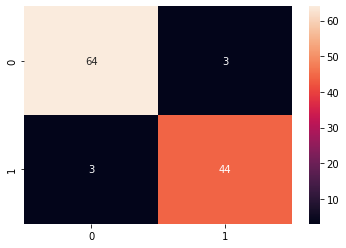

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train_pca, y_train)
predictions = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['1','0']))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## Adaboost without PCA

Accuracy: 0.956140350877193

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.97      0.96        67
           0       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

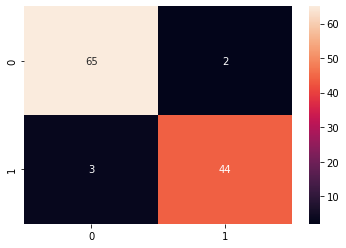

In [ ]:
#https://www.datacamp.com/tutorial/adaboost-classifier-python

from sklearn.ensemble import AdaBoostClassifier

df = pd.read_csv(r"C:\Users\eg1\Downloads\archive (5)\breast-cancer-wisconsin-data_data.csv")
df.drop(['id','Unnamed: 32'], axis = 1, inplace = True)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])

x = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

abc = AdaBoostClassifier()
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['1','0']))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## Adaboost with PCA

Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.99      0.97        67
           0       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<AxesSubplot:>

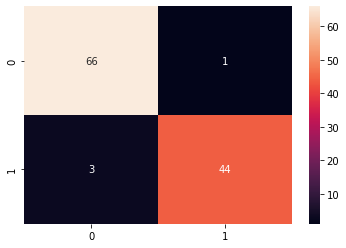

In [ ]:
abc = AdaBoostClassifier()
model = abc.fit(X_train_pca, y_train)
predictions = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['1','0']))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## Random forest without PCA

Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.97      0.98        67
           0       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<AxesSubplot:>

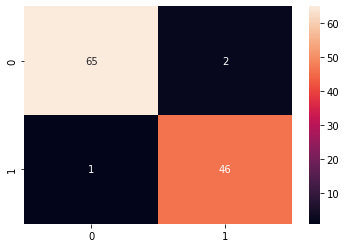

In [ ]:
#https://www.datacamp.com/tutorial/random-forests-classifier-python

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['1','0']))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## Random forest classification with PCA

Accuracy: 0.9298245614035088

Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.96      0.94        67
           0       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



<AxesSubplot:>

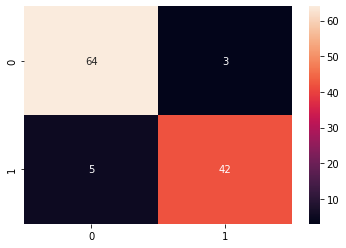

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
y_pred = rf.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['1','0']))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)